In [1]:
#----------------------------------------------------
# Visualize one file of the data  
#----------------------------------------------------
import pandas as pd
import glob
import os

# Correct path to the data
data_directory = '/kaggle/input/mobile-phone-activity'
file_pattern = os.path.join(data_directory, 'sms-call-internet-mi*.csv')
all_files = glob.glob(file_pattern)

# --- Exploratory Code ---
# Make sure files were found before proceeding
if all_files:
    # We choose the fourth file in the list to examine (index 3)
    file_to_examine = all_files[3]
    print(f"--- Examining the contents of the file: {os.path.basename(file_to_examine)} ---")
    
    # Read the first 10 rows of this file without any modifications
    sample_df = pd.read_csv(file_to_examine, header=None, nrows=10)
    
    print("--- Sample of the raw data ---")
    display(sample_df)
else:
    print("Error: No CSV files found in the specified path. Please check the path again.")

--- Examining the contents of the file: sms-call-internet-mi-2013-11-04.csv ---
--- Sample of the raw data ---


,0,1,2,3,4,5,6,7
0,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
1,2013-11-04 00:00:00,1,0,0.108,NaN,NaN,NaN,NaN
2,2013-11-04 00:00:00,1,39,1.0266,0.8069,0.0552,0.2155,50.342
3,2013-11-04 00:00:00,2,0,0.1093,NaN,NaN,NaN,NaN
4,2013-11-04 00:00:00,2,39,1.043,0.8226,0.0556,0.2195,50.432
5,2013-11-04 00:00:00,3,0,0.1106,NaN,NaN,NaN,NaN
6,2013-11-04 00:00:00,3,39,1.0604,0.8393,0.056,0.2238,50.5278
7,2013-11-04 00:00:00,4,0,0.1045,NaN,NaN,NaN,NaN
8,2013-11-04 00:00:00,4,39,0.9791,0.7615,0.0542,0.2039,50.0812
9,2013-11-04 00:00:00,5,0,0.0927,NaN,NaN,NaN,NaN


In [2]:
#----------------------------------------------------
#Load, Clean, and Aggregate All Data
#----------------------------------------------------
import pandas as pd
import glob
import os

# 1. Define the data path and read all files using the correct delimiter
data_directory = '/kaggle/input/mobile-phone-activity'
file_pattern = os.path.join(data_directory, 'sms-call-internet-mi*.csv')
all_files = glob.glob(file_pattern)

list_of_dataframes = []
for filename in all_files:
    # Read the file specifying the correct delimiter (comma) and header row
    df = pd.read_csv(filename, sep=',', header=0, low_memory=False)
    list_of_dataframes.append(df)

# Concatenate all data into a single raw DataFrame
raw_df = pd.concat(list_of_dataframes, axis=0, ignore_index=True)

# 2. Standardize column names
column_mapping = {
    'CellID': 'SquareID', 'datetime': 'TimeInterval', 'countrycode': 'CountryCode',
    'smsin': 'SMSIn', 'smsout': 'SMSOut', 'callin': 'CallIn',
    'callout': 'CallOut', 'internet': 'InternetTraffic'
}
raw_df.rename(columns=column_mapping, inplace=True)

# 3. Convert initial data types
raw_df['TimeInterval'] = pd.to_datetime(raw_df['TimeInterval'])
activity_columns = ['SMSIn', 'SMSOut', 'CallIn', 'CallOut', 'InternetTraffic']
for col in activity_columns:
    raw_df[col] = pd.to_numeric(raw_df[col], errors='coerce')
raw_df.fillna(0, inplace=True)


In [3]:
#----------------------------------------------------
# 4. ✨ Pivotal Step: Aggregate Data (to remove CountryCode) ✨
#----------------------------------------------------
# Define the keys to group by (Time and Location)
grouping_keys = ['TimeInterval', 'SquareID']

# Define the columns to sum (all activities)
columns_to_sum = ['SMSIn', 'SMSOut', 'CallIn', 'CallOut', 'InternetTraffic']

# Perform the aggregation
final_df = raw_df.groupby(grouping_keys)[columns_to_sum].sum().reset_index()

#----------------------------------------------------
# 5. Display Final Results for Confirmation
#----------------------------------------------------
print("Data loaded and aggregated successfully!")
print(f"Number of rows before aggregation (with CountryCode): {len(raw_df)}")
print(f"Number of rows after aggregation (without CountryCode): {len(final_df)}")
print("\n--- Final info on columns and data types ---")
final_df.info()
print("\n--- Sample of the final data ready for analysis ---")
display(final_df.head())
print("\n--- Descriptive statistics of the final data ---")
display(final_df.describe())

Data loaded and aggregated successfully!
Number of rows before aggregation (with CountryCode): 15089165
Number of rows after aggregation (without CountryCode): 1679994

--- Final info on columns and data types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679994 entries, 0 to 1679993
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TimeInterval     1679994 non-null  datetime64[ns]
 1   SquareID         1679994 non-null  int64         
 2   SMSIn            1679994 non-null  float64       
 3   SMSOut           1679994 non-null  float64       
 4   CallIn           1679994 non-null  float64       
 5   CallOut          1679994 non-null  float64       
 6   InternetTraffic  1679994 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 89.7 MB

--- Sample of the final data ready for analysis ---


,TimeInterval,SquareID,SMSIn,SMSOut,CallIn,CallOut,InternetTraffic
0,2013-11-01,1,2.0843,1.1047,0.5919,0.4293,57.7990
1,2013-11-01,2,2.0915,1.0880,0.6020,0.4382,57.9149
2,2013-11-01,3,2.0992,1.0701,0.6128,0.4476,58.0382
3,2013-11-01,4,2.0633,1.1533,0.5627,0.4036,57.4634
4,2013-11-01,5,1.8708,1.0439,0.5110,0.3740,52.1714



--- Descriptive statistics of the final data ---


,TimeInterval,SquareID,SMSIn,SMSOut,CallIn,CallOut,InternetTraffic
count,1679994,1.679994e+06,1.679994e+06,1.679994e+06,1.679994e+06,1.679994e+06,1.679994e+06
mean,2013-11-04 11:29:59.740713216,5.000499e+03,2.708398e+01,1.530119e+01,1.797456e+01,2.061422e+01,4.092967e+02
min,2013-11-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2013-11-02 17:00:00,2.500000e+03,1.914100e+00,1.335900e+00,7.439000e-01,9.888000e-01,7.105497e+01
50%,2013-11-04 11:00:00,5.000000e+03,8.033000e+00,4.852400e+00,4.341900e+00,5.351000e+00,1.809544e+02
75%,2013-11-06 05:45:00,7.501000e+03,2.627210e+01,1.460700e+01,1.708520e+01,1.985810e+01,4.199403e+02
max,2013-11-07 23:00:00,1.000000e+04,2.656462e+03,2.285532e+03,1.533558e+03,1.585057e+03,3.243367e+04
std,NaN,2.886757e+03,6.395151e+01,3.535281e+01,4.410326e+01,4.904902e+01,7.648987e+02


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

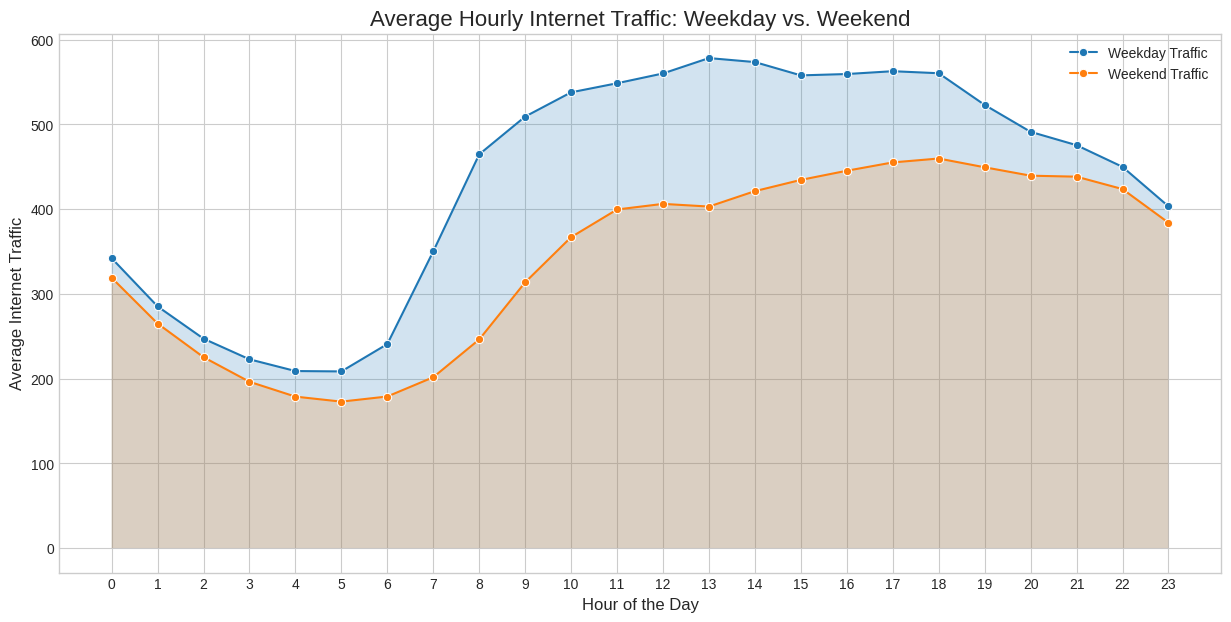


The overall network Busy Hour is: 17:00

--- Descriptive Statistics for Average Hourly Traffic ---


,count,mean,std,min,25%,50%,75%,max
is_weekend,,,,,,,,
False,24.0,435.930814,135.206194,208.493996,327.924831,483.406565,558.315732,578.332659
True,24.0,342.709064,105.424388,172.853643,241.003740,391.840561,435.502886,459.787306


In [4]:
#----------------------------------------------------
# Part A-2: Temporal Pattern Analysis
#----------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract additional information from the TimeInterval column
# The .dt accessor allows us to access date and time properties
final_df['hour'] = final_df['TimeInterval'].dt.hour
final_df['day_name'] = final_df['TimeInterval'].dt.day_name()

# 2. Determine if a day is a weekday or weekend
weekend_days = ['Saturday', 'Sunday']
final_df['is_weekend'] = final_df['day_name'].isin(weekend_days)

# 3. Calculate the average internet traffic per hour, separating weekdays and weekends
# We use groupby again to aggregate data by day type (weekday/weekend) and hour
hourly_traffic = final_df.groupby(['is_weekend', 'hour'])['InternetTraffic'].mean().reset_index()

# 4. Separate the data into two distinct dataframes for easier plotting
weekday_traffic = hourly_traffic[hourly_traffic['is_weekend'] == False]
weekend_traffic = hourly_traffic[hourly_traffic['is_weekend'] == True]

#----------------------------------------------------
# 5. ✨ Plotting the Chart ✨
#----------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid') # To enhance the plot's appearance
plt.figure(figsize=(15, 7)) # To set the figure size

# Plot the line for weekday traffic
sns.lineplot(data=weekday_traffic, x='hour', y='InternetTraffic', label='Weekday Traffic', marker='o')

# Plot the line for weekend traffic
sns.lineplot(data=weekend_traffic, x='hour', y='InternetTraffic', label='Weekend Traffic', marker='o')

# Add titles and labels
plt.title('Average Hourly Internet Traffic: Weekday vs. Weekend', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Internet Traffic', fontsize=12)
plt.xticks(range(0, 24)) # To display all hours on the x-axis
plt.legend()
plt.grid(True)

# Add shaded areas for better visualization
plt.fill_between(weekday_traffic['hour'], weekday_traffic['InternetTraffic'], alpha=0.2)
plt.fill_between(weekend_traffic['hour'], weekend_traffic['InternetTraffic'], alpha=0.2)

# Display the plot
plt.show()

# 6. Determine the Busy Hour based on the highest overall average
busy_hour = final_df.groupby('hour')['InternetTraffic'].mean().idxmax()
print(f"\nThe overall network Busy Hour is: {busy_hour}:00")

# 7. Display descriptive statistics for weekday vs weekend traffic
print("\n--- Descriptive Statistics for Average Hourly Traffic ---")
display(hourly_traffic.groupby('is_weekend')['InternetTraffic'].describe())

In [5]:
#----------------------------------------------------
# Part A-3: Spatial Hotspot Identification
#----------------------------------------------------
import numpy as np

# 1. Aggregate data to determine the total internet traffic for each square
# We group the data by SquareID and sum all InternetTraffic for each square
spatial_traffic = final_df.groupby('SquareID')['InternetTraffic'].sum().reset_index()

# 2. Sort the squares to identify the top 10 most congested areas
top_10_hotspots = spatial_traffic.sort_values(by='InternetTraffic', ascending=False).head(10)

print("--- Top 10 Most Congested Areas (Hotspots) in the City ---")
# Reset the index to be from 1 to 10 for better readability
top_10_hotspots.reset_index(drop=True, inplace=True)
top_10_hotspots.index += 1
display(top_10_hotspots)



--- Top 10 Most Congested Areas (Hotspots) in the City ---


,SquareID,InternetTraffic
1,5161,1.514767e+06
2,5059,1.301888e+06
3,5259,1.203501e+06
4,5061,1.137296e+06
5,5258,1.053947e+06
6,4459,1.011602e+06
7,6064,1.002268e+06
8,5159,9.965819e+05
9,5758,9.767111e+05
10,4856,9.431863e+05


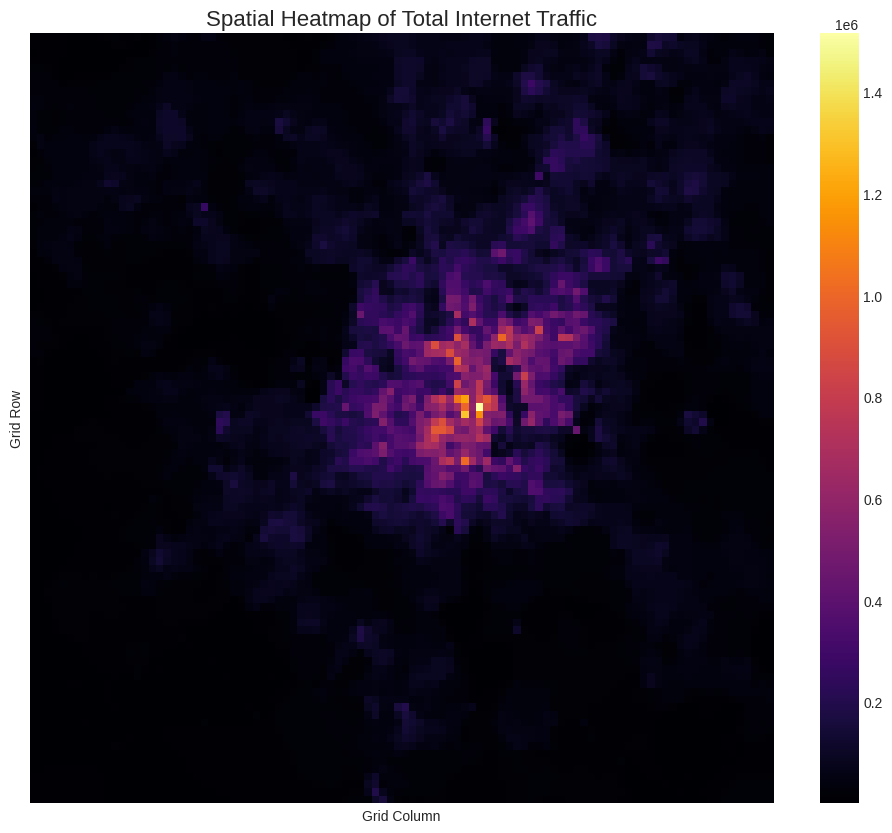

In [6]:
#----------------------------------------------------
# 3. ✨ Creating the Heatmap ✨
#----------------------------------------------------
# The assignment states the grid is 100x100
# We create an empty matrix (filled with zeros) of size 100x100
grid = np.zeros((100, 100))

# We populate the matrix with the internet traffic data
for index, row in spatial_traffic.iterrows():
    square_id = int(row['SquareID'])
    traffic = row['InternetTraffic']

   
    # We convert the SquareID into coordinates (row and column) in the matrix
    # We assume ID 1 is (0,0), ID 101 is (1,0), and so on
    row_coord = (square_id - 1) // 100
    col_coord = (square_id - 1) % 100
    
    # We ensure the coordinates are within the matrix boundaries
    if row_coord < 100 and col_coord < 100:
        grid[row_coord, col_coord] = traffic

# 4. Plotting the Heatmap
plt.figure(figsize=(12, 10))
# np.flipud is used to flip the grid vertically so that the origin (0,0) is at the top-left
sns.heatmap(np.flipud(grid), cmap="inferno", xticklabels=False, yticklabels=False)
plt.title("Spatial Heatmap of Total Internet Traffic", fontsize=16)
plt.xlabel("Grid Column")
plt.ylabel("Grid Row")
plt.show()

In [7]:
#----------------------------------------------------
# ✨ Creating an Interactive Heatmap ✨
#----------------------------------------------------
import plotly.graph_objects as go
import numpy as np # Make sure numpy is imported

# 1. Prepare the data grids for the heatmap
# We need a NumPy array for the heatmap color values (traffic_grid)
traffic_grid = np.zeros((100, 100))

# We create a standard list of lists for the hover text
hover_text_grid = [['' for _ in range(100)] for _ in range(100)]

# Populate the grids with data
for index, row in spatial_traffic.iterrows():
    square_id = int(row['SquareID'])
    traffic = row['InternetTraffic']
    
    row_coord = (square_id - 1) // 100
    col_coord = (square_id - 1) % 100
    
    if row_coord < 100 and col_coord < 100:
        traffic_grid[row_coord, col_coord] = traffic
        
        # --- This is the corrected line ---
        # Access the list using [row][column] instead of [row, column]
        hover_text_grid[row_coord][col_coord] = (f"<b>SquareID: {square_id}</b><br>"
                                                 f"Total Traffic: {traffic:,.0f} Kb")

# 2. Create the interactive heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=traffic_grid,
    text=hover_text_grid,
    hoverinfo='text',
    colorscale='inferno'
))

# 3. Update the layout for a professional look
fig.update_layout(
    title='Interactive Spatial Heatmap of Total Internet Traffic',
    xaxis_title="Grid Column",
    yaxis_title="Grid Row",
    yaxis_autorange='reversed', # To match the orientation of the static heatmap
    font=dict(
        family="Arial, sans-serif",
        size=14
    )
)

# 4. Show the interactive map
fig.show()

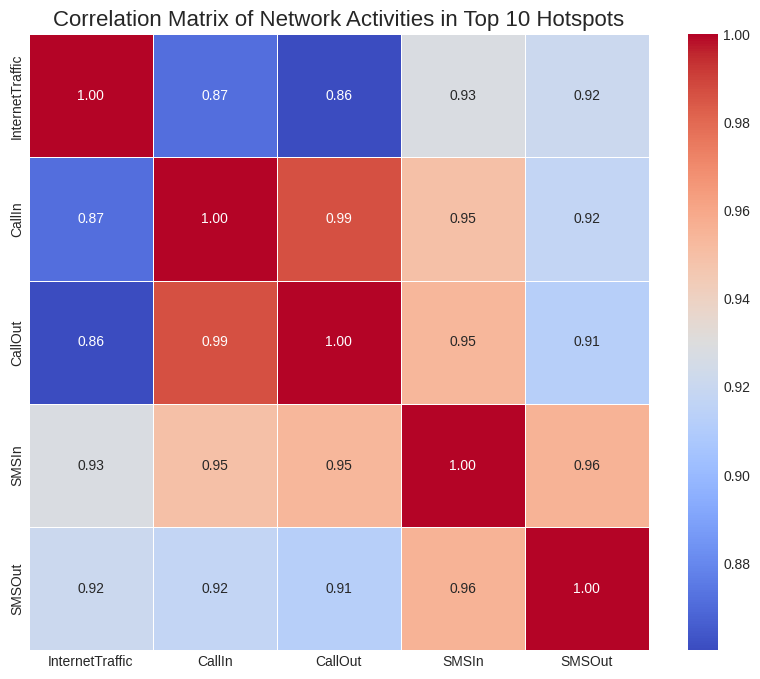

In [8]:
#----------------------------------------------------
# Part B-1: Multi-Dimensional Correlation Analysis
#----------------------------------------------------

# 1. Filter the data to include only the top 10 most congested areas
top_10_ids = top_10_hotspots['SquareID'].tolist()
hotspots_df = final_df[final_df['SquareID'].isin(top_10_ids)]

# 2. Select the columns for which we want to analyze the correlation
correlation_df = hotspots_df[['InternetTraffic', 'CallIn', 'CallOut', 'SMSIn', 'SMSOut']]

# 3. Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# 4. Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Network Activities in Top 10 Hotspots', fontsize=16)
plt.show()

In [9]:
#----------------------------------------------------
# Part (C): Final Version for the Interactive Dashboard
#----------------------------------------------------
import plotly.express as px
import pandas as pd
import numpy as np

# 1. We use the 'spatial_traffic' DataFrame, which contains the total traffic for each SquareID
# This should have been calculated in Part A-3

# 2. We identify the Top 10 hotspots and assign a 'Diagnosis'
top_10_ids = top_10_hotspots['SquareID'].tolist()

# Create a new 'Diagnosis' column:
# If a SquareID is in the top 10 list, it's 'Capacity-limited', otherwise it's 'Healthy'
spatial_traffic['Diagnosis'] = np.where(
    spatial_traffic['SquareID'].isin(top_10_ids),
    'Capacity-limited (Top 10)', # Diagnosis for the congested cells
    'Healthy'                      # Diagnosis for all other cells
)

# 3. Calculate the (X, Y) coordinates for each SquareID to plot them on the map
spatial_traffic['Row'] = (spatial_traffic['SquareID'] - 1) // 100
spatial_traffic['Col'] = (spatial_traffic['SquareID'] - 1) % 100

# 4. Create the interactive scatter plot (using your excellent code structure)
fig = px.scatter(
    spatial_traffic,
    x='Col', y='Row',
    color='Diagnosis',                # Color by our new diagnosis
    size='InternetTraffic',           # The size of the point reflects the traffic volume
    hover_name='SquareID',
    hover_data={'InternetTraffic': True, 'Diagnosis': True, 'Row': False, 'Col': False},
    color_discrete_map={
        'Capacity-limited (Top 10)': 'red', # Red for the congested hotspots
        'Healthy': 'lightgray'                  # Gray for the rest of the cells
    },
    title="Interactive 4G Network Congestion Map"
)

# 5. Improve the general layout
fig.update_layout(
    xaxis_title="Grid Column",
    yaxis_title="Grid Row",
    yaxis_autorange='reversed',
    font=dict(size=13),
    plot_bgcolor='white',
    legend_title_text='Cell Status'
)

# Show the interactive map
fig.show()

--- 📊  Capacity Utilization during Busy Hour (Top 10 Hotspots) ---


,SquareID,AvgThroughput_Mbps,Utilization_Percentage
5,5161,0.03,0.02
2,5059,0.02,0.02
7,5259,0.02,0.01
3,5061,0.02,0.01
6,5258,0.02,0.01
4,5159,0.02,0.01
9,6064,0.02,0.01
0,4459,0.02,0.01
1,4856,0.01,0.01
8,5758,0.01,0.01


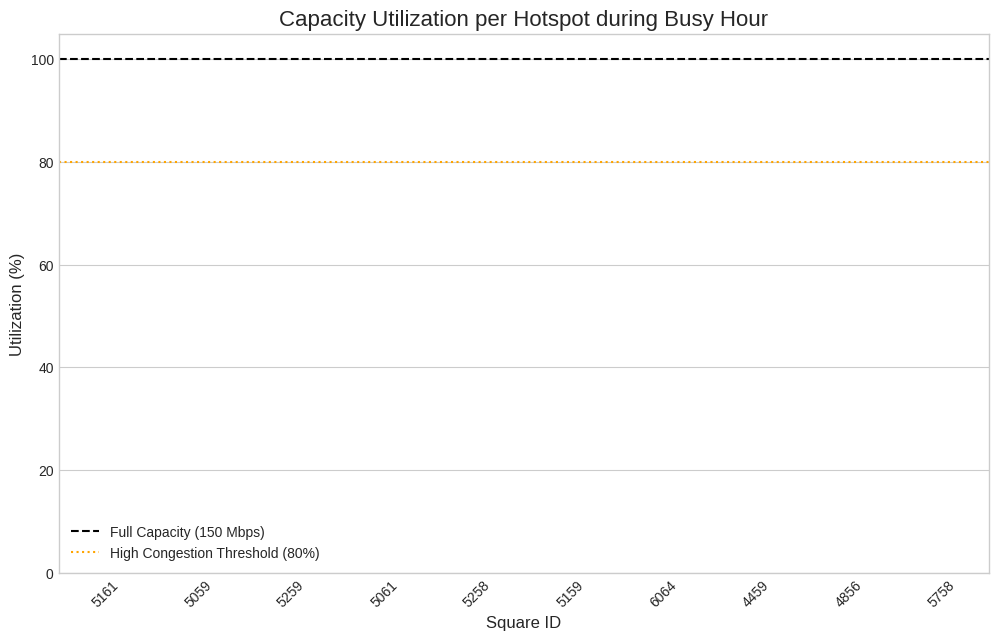

In [10]:
#====================================================
#  CAPACITY UTILIZATION ANALYSIS 
#====================================================

# 1. Filter data for the top 10 hotspots and only during the busy hour
top_10_ids = top_10_hotspots['SquareID'].tolist()
busy_hour = 17 # as previously determined

hotspot_busy_hour_df = final_df[
    (final_df['SquareID'].isin(top_10_ids)) &
    (final_df['hour'] == busy_hour)
]

# 2. Calculate the average internet traffic for each hotspot
utilization_results = hotspot_busy_hour_df.groupby('SquareID')['InternetTraffic'].mean().reset_index()
utilization_results.rename(columns={'InternetTraffic': 'AvgTraffic_Kb_per_10min'}, inplace=True)

# 3. Define constants
SECTOR_CAPACITY_MBPS = 150
INTERVAL_SECONDS = 600

# 4. Calculate the average throughput and the utilization percentage
utilization_results['AvgThroughput_Mbps'] = utilization_results['AvgTraffic_Kb_per_10min'] / (INTERVAL_SECONDS * 1000)
utilization_results['Utilization_Percentage'] = (utilization_results['AvgThroughput_Mbps'] / SECTOR_CAPACITY_MBPS) * 100

# 5. Display the utilization table
print("--- 📊  Capacity Utilization during Busy Hour (Top 10 Hotspots) ---")
display(utilization_results[['SquareID', 'AvgThroughput_Mbps', 'Utilization_Percentage']].sort_values('Utilization_Percentage', ascending=False).round(2))

# 6. Plot the utilization results
plt.figure(figsize=(12, 7))
sns.barplot(
    data=utilization_results.sort_values('Utilization_Percentage', ascending=False),
    x='SquareID', y='Utilization_Percentage', palette='Reds_r', order=utilization_results.sort_values('Utilization_Percentage', ascending=False)['SquareID']
)
plt.axhline(100, color='black', linestyle='--', label='Full Capacity (150 Mbps)')
plt.axhline(80, color='orange', linestyle=':', label='High Congestion Threshold (80%)')
plt.title('Capacity Utilization per Hotspot during Busy Hour', fontsize=16)
plt.ylabel('Utilization (%)', fontsize=12)
plt.xlabel('Square ID', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [11]:
#====================================================
# FINAL RECOMMENDATIONS (PART C)
#====================================================

# 1. Define the list of recommendations for the capacity issue
capacity_solutions = (
    "1. Activate Carrier Aggregation to increase capacity.\n"
    "2. Upgrade antennas to 4x4 MIMO to improve efficiency.\n"
    "3. Implement Load Balancing to alleviate cell pressure.\n"
    "4. (For extreme cases) Investigate Sector Splitting possibility."
)

# 2. Create the final optimization dataframe
optimization_df = utilization_results[['SquareID', 'Utilization_Percentage']].copy()
optimization_df['Diagnosis'] = 'Capacity-limited'
optimization_df['Optimization_Proposal'] = capacity_solutions

# 3. Display the final results in an organized table
print("\n--- 🚀  Optimization Proposals for Top 10 Hotspots ---")
display(optimization_df.sort_values('Utilization_Percentage', ascending=False).round(2))


--- 🚀  Optimization Proposals for Top 10 Hotspots ---


,SquareID,Utilization_Percentage,Diagnosis,Optimization_Proposal
5,5161,0.02,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
2,5059,0.02,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
7,5259,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
3,5061,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
6,5258,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
4,5159,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
9,6064,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
0,4459,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
1,4856,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
8,5758,0.01,Capacity-limited,1. Activate Carrier Aggregation to increase ca...
